In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
data = pd.read_csv("online_retail_II.csv")
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [4]:
data.dropna(subset=["Customer ID"], inplace=True)

data["TotalPrice"] = data["Quantity"] * data["Price"]

In [6]:
customer_data = data.groupby("Customer ID").agg({
    "TotalPrice": "sum",
    "Quantity": "sum"
}).reset_index()

In [7]:
X = customer_data[["TotalPrice", "Quantity"]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_scaled)


In [9]:
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance}")
print(f"Cumulative Explained Variance: {np.cumsum(explained_variance)}")

Explained Variance Ratio: [0.93825016 0.06174984]
Cumulative Explained Variance: [0.93825016 1.        ]


In [10]:
pca_data = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_data["Customer ID"] = customer_data["Customer ID"]

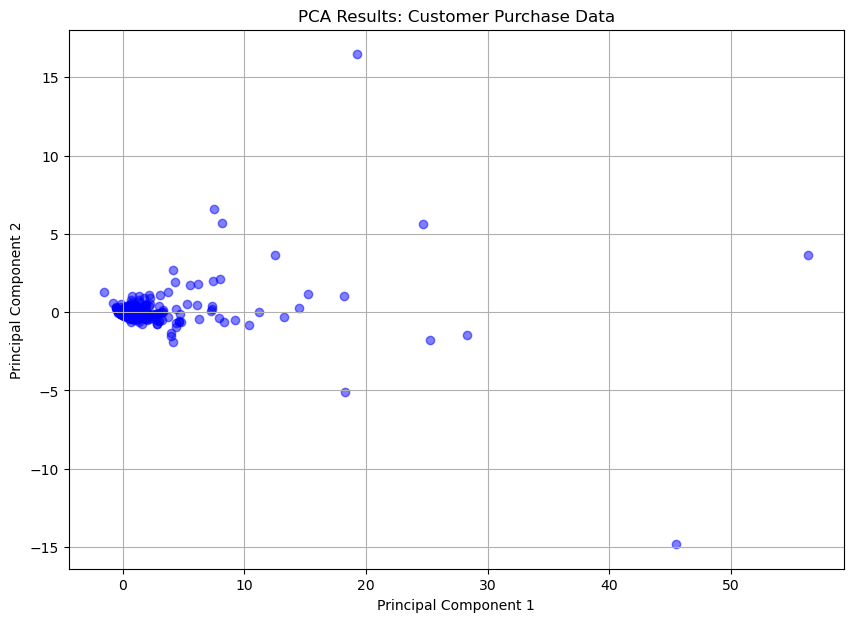

In [11]:
plt.figure(figsize=(10, 7))
plt.scatter(pca_data["PC1"], pca_data["PC2"], alpha=0.5, c="blue")
plt.title("PCA Results: Customer Purchase Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid()
plt.show()